<a href="https://colab.research.google.com/github/Nataliya2401/DS_11/blob/main/hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
pip install surprise

In [7]:
from surprise import Dataset, SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV

In [8]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [9]:
def get_n_predict(predictions, n=10):
  top_n = {}
  for uid, iid, true_r, est, _ in predictions:
    top_n[uid] = top_n.get(uid, []) + [(iid, est)]
# Then sort the predictions for each user and retrieve the k highest ones.

  for uid, user_r in top_n.items():
    user_r.sort(key=lambda x: x[1], reverse=True)
    top_n[uid] = user_r[:n]

  return top_n

In [50]:
trainset, testset = train_test_split(data, test_size=.25)

In [11]:
algo = SVD()
algo.fit(trainset)
predictions1 = algo.test(testset)

In [12]:
accuracy.rmse(predictions1)

RMSE: 0.9441


0.9441103772873276

In [13]:
top_predictions1 = get_n_predict(predictions1, 10)

In [14]:
top_predictions1['825']


[('174', 4.610819167264405),
 ('275', 4.2672273189227035),
 ('742', 4.222810676008297),
 ('385', 4.1617566592585),
 ('98', 4.145404011183724),
 ('566', 4.141064708960693),
 ('100', 4.126154730441253),
 ('9', 3.9804967090721775),
 ('257', 3.966476433208827),
 ('748', 3.948520202620639)]

In [48]:
# First train an SVD algorithm on the movielens dataset.
trainset2 = data.build_full_trainset()
algo.fit(trainset2)

In [49]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset2 = trainset.build_anti_testset()
predictions = algo.test(testset2)


In [51]:
accuracy.rmse(predictions)

RMSE: 0.9407


0.9406733672029383

In [52]:
top_n = get_n_predict(predictions, 15)

In [54]:
top_n['825']

[('114', 5),
 ('868', 5),
 ('1500', 5),
 ('1463', 5),
 ('814', 5),
 ('1449', 5),
 ('1536', 5),
 ('1293', 5),
 ('851', 5),
 ('1599', 5),
 ('1653', 5),
 ('1467', 5),
 ('169', 4.988207859576243),
 ('1398', 4.951821272462361),
 ('64', 4.922193584897828)]

In [21]:
cv= cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9432  0.9462  0.9445  0.9446  0.0012  
MAE (testset)     0.7437  0.7470  0.7468  0.7458  0.0015  
Fit time          1.11    1.08    2.08    1.42    0.47    
Test time         0.61    0.20    1.27    0.69    0.44    


In [23]:
RecomandSystemResult = pd.DataFrame(columns = ['Algo', 'RMSE', 'MAE', 'TimeFit', 'TimeTest'])

In [26]:
from surprise import NormalPredictor, KNNBasic, KNNBaseline, SlopeOne,  BaselineOnly, SVDpp

In [27]:
Algos = (NormalPredictor(), SVD(), SVDpp(),  KNNBasic(), KNNBaseline(), BaselineOnly(), SlopeOne())

NormalPredictor - Алгоритм прогнозування випадкового рейтингу на основі розподілу
навчального набору, який вважається нормальним.  
KNNBasic - Базовий алгоритм спільної фільтрації.
KNNBaseline - Базовий алгоритм спільної фільтрації з урахуванням базового рейтингу.
BaselineOnly - Алгоритм прогнозування базової оцінки для даного користувача та
елемента

In [28]:
for algo in Algos:
  print(algo.__class__.__name__)

NormalPredictor
SVD
SVDpp
KNNBasic
KNNBaseline
BaselineOnly
SlopeOne


In [29]:
for algo in Algos:
  cv = cross_validate(algo, data,measures=["RMSE", "MAE"], cv=3, verbose=True)

  RecomandSystemResult = pd.concat([RecomandSystemResult, pd.DataFrame({'Algo': [algo.__class__.__name__],
                               'RMSE': [np.mean(cv['test_rmse']).round(5)],
                               'MAE': [np.mean(cv['test_mae']).round(5)],
                               'TimeFit': [np.mean(cv['fit_time']).round(3)],
                              'TimeTest': [np.mean(cv['test_time']).round(3)]})],
                              ignore_index=True)


Evaluating RMSE, MAE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.5178  1.5242  1.5178  1.5199  0.0030  
MAE (testset)     1.2207  1.2244  1.2189  1.2213  0.0023  
Fit time          0.80    0.22    0.11    0.37    0.30    
Test time         0.82    0.35    0.14    0.44    0.29    
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9541  0.9387  0.9452  0.9460  0.0063  
MAE (testset)     0.7526  0.7420  0.7447  0.7464  0.0045  
Fit time          1.07    1.07    1.63    1.25    0.26    
Test time         0.23    0.20    0.46    0.30    0.12    
Evaluating RMSE, MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9286  0.9246  0.9273  0.9269  0.0017  
MAE (testset)     0.7315  0.7259  0.7277  0.7284  0.0023  
Fit time          21.54   20.04   19.10   20.23   1.00   

In [30]:
RecomandSystemResult

,Algo,RMSE,MAE,TimeFit,TimeTest
0,NormalPredictor,1.51994,1.22132,0.375,0.436
1,SVD,0.94598,0.74642,1.254,0.295
2,SVDpp,0.92685,0.72838,20.225,6.687
3,KNNBasic,0.98797,0.78045,0.256,5.048
4,KNNBaseline,0.93657,0.73836,0.487,5.682
5,BaselineOnly,0.94690,0.75128,0.255,0.226
6,SlopeOne,0.94823,0.74523,0.585,3.599


<function matplotlib.pyplot.show(close=None, block=None)>

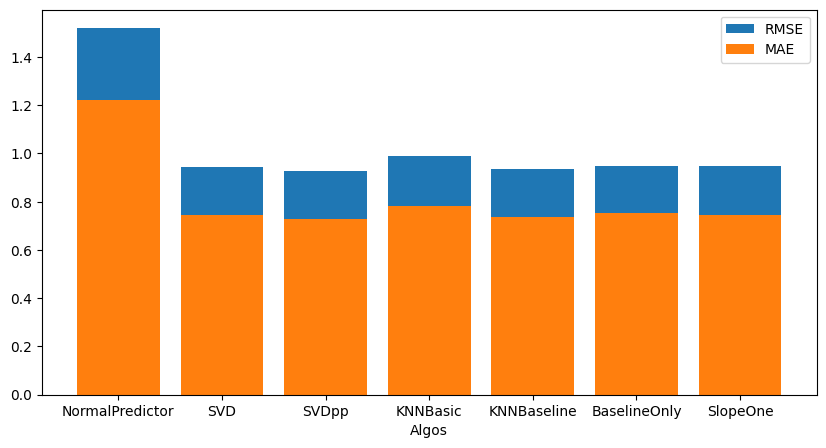

In [31]:
plt.figure(figsize=(10,5))

p1 = plt.bar(RecomandSystemResult['Algo'],RecomandSystemResult['RMSE'])
p2 = plt.bar(RecomandSystemResult['Algo'],RecomandSystemResult['MAE'])
plt.legend((p1[0], p2[0]), ('RMSE', 'MAE'))
plt.xlabel('Algos')

plt.show

SVD++ and KNNBaseline has the lowest RMSE and the lowest MAE. But TimeFit and TimeTest for SVD++ very big.

# Parameter Optimization

In [ ]:
param_gridKNNB = {'n_epochs': [5, 10, 15],
        'lr_all': [0.002, 0.005],
        'reg_all': [0.05, 0.1, 0.4, 0.6, 0.8]
        }

gsKNNB = GridSearchCV(KNNBaseline, param_gridKNNB, measures=['rmse', 'mae'], cv=3)

gsKNNB.fit(data)

print('Best RMSE:', gsKNNB.best_score['rmse'], gsKNNB.best_params['rmse'])
print('Best MAE:', gsKNNB.best_score['mae'], gsKNNB.best_params['mae'])

In [45]:
print('Best RMSE:', gsKNNB.best_score['rmse'], gsKNNB.best_params['rmse'])
print('Best MAE:', gsKNNB.best_score['mae'], gsKNNB.best_params['mae'])

Best RMSE: 0.9361973933595631 {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.05}
Best MAE: 0.7382833162821205 {'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.05}


In [55]:
algo_gsKNNb = KNNBaseline(n_epochs=5, lr_all=0.002, reg_all=0.05)

predictions_gsKNNb =algo_gsKNNb.fit(trainset).test(testset)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [56]:
predictions_gsKNNb
Result_for_gsKNNb = pd.DataFrame(predictions_gsKNNb, columns=['UserID', 'ItemID', 'Real_Rating', 'Estimate', 'Details'])
Result_for_gsKNNb = Result_for_gsKNNb.drop(['Details'], axis=1)
Result_for_gsKNNb.sample(5)

,UserID,ItemID,Real_Rating,Estimate
12526,419,494,3.0,4.382399
22001,220,288,5.0,3.593918
10902,919,140,5.0,3.162240
8373,393,374,3.0,2.401052
13767,192,125,3.0,3.383518


In [57]:
accuracy.rmse(predictions_gsKNNb)

RMSE: 0.9343


0.9343011840300117

In [36]:
import math

In [37]:
def halfround(estimate):
  frac, intgr = math.modf(estimate)
  if frac < 0.25:
    f = 0
  elif frac < 0.5:
    f = 0.5
  else:
    f = 1
  return intgr + f


In [58]:
Result_for_gsKNNb['Rounded_Estimate'] = Result_for_gsKNNb.apply(lambda row: round(row['Estimate']), axis=1)
Result_for_gsKNNb['Error'] = abs(Result_for_gsKNNb['Real_Rating'] - Result_for_gsKNNb['Rounded_Estimate'])

In [59]:
Result_for_gsKNNb.head()

,UserID,ItemID,Real_Rating,Estimate,Rounded_Estimate,Error
0,703,926,4.0,2.763129,3,1.0
1,342,1011,3.0,3.116077,3,0.0
2,374,1513,2.0,2.216452,2,0.0
3,283,732,4.0,3.875228,4,0.0
4,916,467,3.0,3.733057,4,1.0


In [60]:
n_results = Result_for_gsKNNb['Real_Rating'].count()
sum_rating = Result_for_gsKNNb['Real_Rating'].sum()
sum_error =  Result_for_gsKNNb['Error'].sum()
frac_error = round(sum_error / sum_rating, 4)
number_correct_predictions = Result_for_gsKNNb['Real_Rating'][Result_for_gsKNNb['Error'] == 0].count()
frac_correct_pred = number_correct_predictions / n_results

In [61]:
print(f'Кількість результатів {n_results},  доля помилок {frac_error}, доля коректних результатів {frac_correct_pred}')

Кількість результатів 25000,  доля помилок 0.1995, доля коректних результатів 0.41384


In [62]:
ResultComparison = pd.DataFrame({'Count': Result_for_gsKNNb.groupby(['Real_Rating']).size(),
        'Avg_Rounded_Est': Result_for_gsKNNb.groupby(['Real_Rating'])['Rounded_Estimate'].mean()
        }).reset_index()


In [63]:
ResultComparison

,Real_Rating,Count,Avg_Rounded_Est
0,1.0,1563,2.702495
1,2.0,2934,3.081118
2,3.0,6750,3.354519
3,4.0,8548,3.699813
4,5.0,5205,3.992123


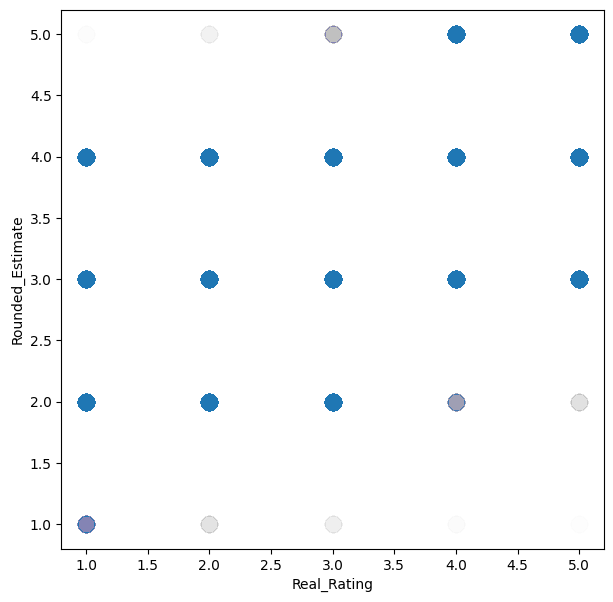

In [64]:
Result_for_gsKNNb.plot.scatter(x='Real_Rating', y='Rounded_Estimate', alpha=0.004, s=150, figsize=(7,7))
plt.show()